In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [142]:
np.random.seed(0) #for reproducibility: makes the random number predictable:to make sure the same number generated everytime and the code initialized the same everytime

In [143]:
#<mean,deviation,size> Gaussian distribution
dogs_whisker_length=np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [144]:
dogs_whisker_length #x less for dogs ~5
dogs_ear_flappiness_index #y more for dogs ~8

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [145]:
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [146]:
cats_whisker_length #x more for cats ~8
cats_ear_flappiness_index #less for cats ~5

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

In [147]:
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T
data=np.vstack((dogs_data,cats_data))
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [148]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [149]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
#random state ensures the randomisation remains same everytime

In [150]:
x_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

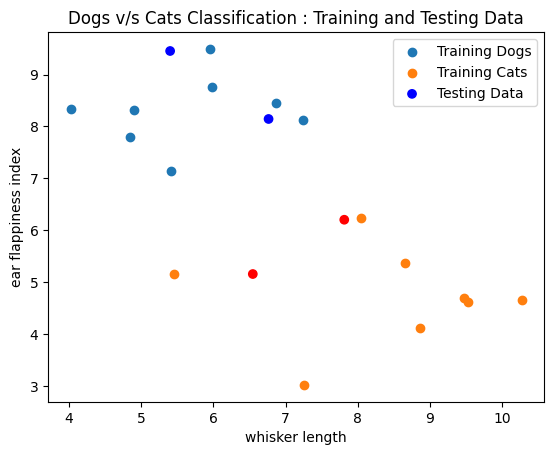

In [151]:
plt.scatter(x_train[y_train==0][:,0],x_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(x_train[y_train==1][:,0],x_train[y_train==1][:,1],label='Training Cats')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='bwr',label='Testing Data')
plt.xlabel('whisker length')
plt.ylabel('ear flappiness index')
plt.title("Dogs v/s Cats Classification : Training and Testing Data")
plt.legend() #for the markings or references:takes the label
plt.show()

In [152]:
#implementing Random Linear Algorithm
def random_linear_classifier(dogs_data,cats_data,k,d): #d is the no of features ear and whisker or dimensions of theta
    best_error=float('inf')
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta=np.random.normal(size=d)
        theta0=np.random.normal()

        error=compute_error(dogs_data,cats_data,theta,theta0)

        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
            
    return best_theta,best_theta0,error

In [153]:
def compute_error(dogs_data,cats_data,theta,theta0):
    error=0
    for x_dog in dogs_data:
        if np.dot(theta,x_dog) + theta0<=0 :
            error+=1
    for x_cat in cats_data:
        if np.dot(theta,x_cat) + theta0>=0 :
            error+=1
    return error

In [154]:
#prepare data for algo: the vstack gets the x and y coordinates together
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T #.T for transpose

In [155]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [156]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [157]:
#Run random linear classifier algo
k=100 #no of iterations
d=2 #no of features
best_theta_train,best_theta0_train,train_error=random_linear_classifier(x_train[y_train==0],x_train[y_train==1],k,d)

In [158]:
best_theta_train

array([-1.07075262,  1.05445173])

In [159]:
best_theta0_train

-0.40317694697317963

In [160]:
x_vals_train=np.linspace(2,10,100)
y_vals_train=(-best_theta[0]/best_theta[1]*x_vals-(best_theta0/best_theta[1]))

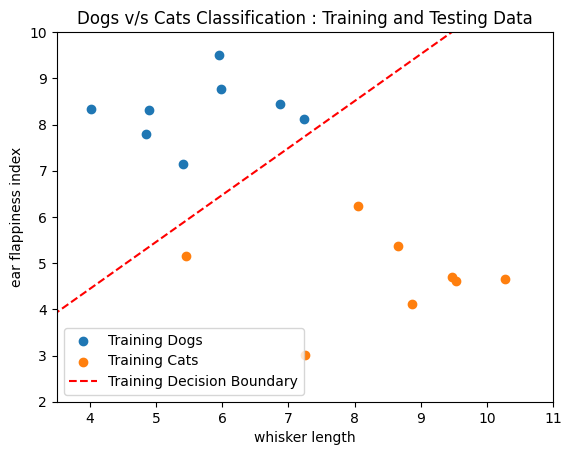

In [161]:
plt.scatter(x_train[y_train==0][:,0],x_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(x_train[y_train==1][:,0],x_train[y_train==1][:,1],label='Training Cats')
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label='Training Decision Boundary')
plt.xlim([3.5,11])
plt.ylim([2,10])
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='bwr',label='Testing Data')
plt.xlabel('whisker length')
plt.ylabel('ear flappiness index')
plt.title("Dogs v/s Cats Classification : Training and Testing Data")
plt.legend() #for the markings or references:takes the label
plt.show()

In [164]:
print(f"training error:{train_error}")

training error:16


In [165]:
test_error=compute_error(x_test[y_test==0],x_test[y_test==1],best_theta_train,best_theta0_train)


In [166]:
test_error

0